In [36]:
import numpy as np 
import time as t
import matplotlib.pyplot as plt

In [37]:
def changeRows(A,b, row1, row2):
    temp = np.copy(A[row1])
    A[row1] = A[row2]
    A[row2] = temp

    temp_b = b[row1]
    b[row1] = b[row2]
    b[row2] = temp_b




def retroSubstitution(A,b):
    n = len(b)
    x = np.zeros(n)
    for i in range(n-1,-1,-1):
        sum_ax = 0
        for j in range(i+1,n):
            sum_ax += A[i][j] * x[j]
        x[i] = (b[i] - sum_ax) / A[i][i]
    return x


def gaussianElimination(A,b): 
    n = len(b)
    for i in range(n): 
        pivot_index = i
        for k in range(i+1, n):
            if abs(A[k][i]) > abs(A[pivot_index][i]):
                pivot_index = k
        if pivot_index != i:
            changeRows(A, b, i, pivot_index)   
        if A[i][i] == 0:
            raise ValueError("Matrix is singular")
        for j in range(i+1, n):
            multiplier = A[j][i] / A[i][i]
            for k in range(i+1, n): 
                A[j][k] = A[j][k] - multiplier * A[i][k]
            b[j] = b[j] - multiplier * b[i]      
    x = retroSubstitution(A, b)
    return x


matrix = np.array([[1,1,1],
                   [2,2,5],
                   [4,6,8]])


b = np.array([8,0,-5])

solution = gaussianElimination(matrix,b)
print(solution)

[ 33.25 -11.    -9.  ]


Atividade 2

Tempo médio de execução para 10 eliminações: 0.508370 segundos


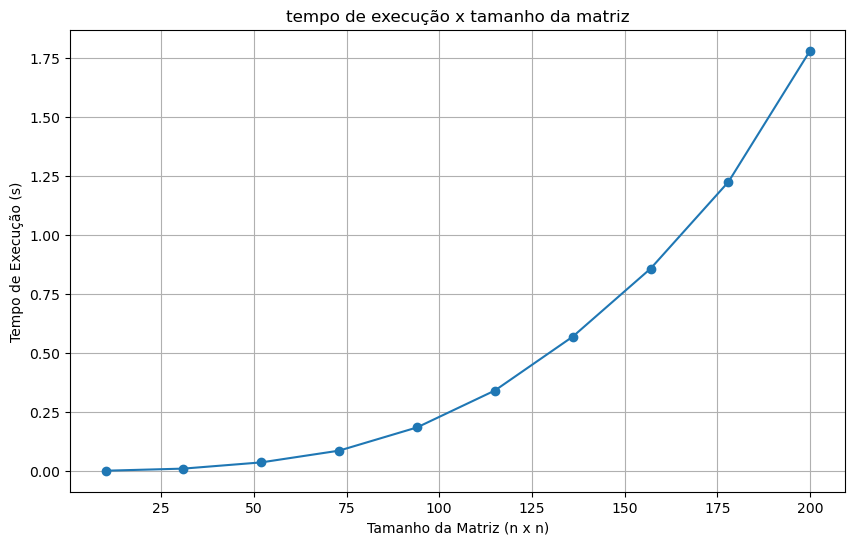

In [42]:
eliminations = 10
a, b = 10, 200

n_values = np.linspace(a, b, eliminations, dtype=int)
times = np.zeros(eliminations)
total_time = 0
k = 0

for i in n_values:
    A = np.random.rand(i, i)
    b = np.random.rand(i)

    start_time = t.time()
    solution = gaussianElimination(A, b)
    end_time = t.time()
    times[k] = end_time - start_time
    total_time += times[k]
    k += 1

average_time = total_time / eliminations

print(f"Tempo médio de execução para {eliminations} eliminações: {average_time:.6f} segundos")


plt.figure(figsize=(10, 6))
plt.plot(n_values, times, marker='o')
plt.title('tempo de execução x tamanho da matriz')
plt.xlabel('Tamanho da Matriz (n x n)')
plt.ylabel('Tempo de Execução (s)')
plt.grid()
plt.show()